In [ ]:
import pandas as pd
bop_data = pd.read_csv('/content/bop_data.csv')
bop_data.head()

,Site,Date,live_dead,shell_height_mm,total_live,sample,time,latitude,longitude,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Bush Terminal Park,7/20/2016,NaN,12.0,NaN,A,2:14:00 PM,40.653736,-74.018760,0.0,8.64,37.4,16.0,NaN,27.40,23.8,12.15,NaN,NaN,NaN,NaN,NaN
1,Bush Terminal Park,7/20/2016,NaN,12.0,NaN,B,2:22:00 PM,40.654206,-74.019517,0.0,8.21,37.8,12.0,23.1,25.52,24.0,8.26,NaN,NaN,NaN,NaN,NaN
2,Bush Terminal Park,7/20/2016,NaN,12.0,NaN,C,2:26:00 PM,40.654473,-74.019106,1.0,8.35,38.3,8.9,23.4,25.27,24.3,9.19,NaN,NaN,NaN,NaN,NaN
3,Bush Terminal Park,7/20/2016,NaN,12.0,NaN,D,2:30:00 PM,40.654269,-74.018720,1.0,8.69,38.6,14.1,23.5,26.89,24.5,11.99,NaN,NaN,NaN,NaN,NaN
4,Bush Terminal Park,7/20/2016,NaN,12.0,NaN,E,2:36:00 PM,40.654438,-74.018495,0.0,7.92,39.1,10.4,23.9,24.66,24.9,7.53,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Numeric libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Predictive models
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
bop_data = bop_data.drop(columns=['Site', 'Date', 'sample','time', 'latitude', 'longitude','live_dead', 'total_live'], axis=1)

In [ ]:
bop_data.head()
bop_data = bop_data.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'])

In [ ]:
bop_data2 = bop_data.dropna()
bop_data2 = bop_data.fillna(0)
bop_data2.head()

,shell_height_mm,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
0,12.0,0.0,8.64,37.4,16.0,0.0,27.40,23.8,12.15
1,12.0,0.0,8.21,37.8,12.0,23.1,25.52,24.0,8.26
2,12.0,1.0,8.35,38.3,8.9,23.4,25.27,24.3,9.19
3,12.0,1.0,8.69,38.6,14.1,23.5,26.89,24.5,11.99
4,12.0,0.0,7.92,39.1,10.4,23.9,24.66,24.9,7.53


In [ ]:
X = bop_data2.drop(columns = ['shell_height_mm', 'depth_m', 'pH', 'cond_mScm', 'TDS_gL', 'temp_C', 'sal_ppt', 'turb_NTU'])


In [ ]:
X.columns

Index(['DO_mgL'], dtype='object')

In [ ]:
y = bop_data2['temp_C']

In [ ]:
y.head()

0    27.40
1    25.52
2    25.27
3    26.89
4    24.66
Name: temp_C, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(normalize=True)

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, y_predict)

3.6539990194629084

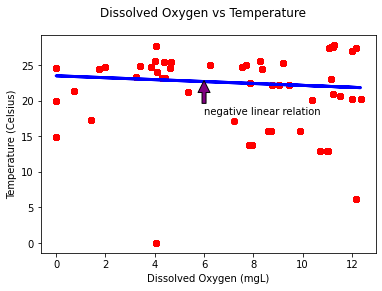

In [ ]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, y_predict, color = 'blue', linewidth = 3)
plt.xlabel('Dissolved Oxygen (mgL)')
plt.ylabel('Temperature (Celsius)')
plt.suptitle("Dissolved Oxygen vs Temperature")
plt.annotate('negative linear relation', xy=(6,23), xytext = (6,18), arrowprops = dict(facecolor = "purple", shrink = 0.05),)
plt.show()

In [ ]:
np.random.seed(10)
import matplotlib.axes.Axes.label.set_size
print(data)
data = bop_data['temp_C']
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data)
axes.yaxis.label.set_size(30)

plt.show()

ModuleNotFoundError: ignored

In [ ]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})

In [ ]:
result

,Actual,Predicted
222,27.4000,21.833531
12947,22.4000,22.410862
14592,23.1000,22.875149
1971,26.8900,21.855063
2871,26.8900,21.855063
...,...,...
2773,25.5200,22.357031
7596,27.4000,21.833531
17813,22.1835,22.252399
17164,22.2035,22.195877
